# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

# Solution
the n_estimators parameter determines how many trees the model will generate. A higher number will mean that more trees will be generated, which is good for the model as it will be better at predicting as the model will be bigger. But aditional trees also require additional computational power, so because of this, and the fact that each ekstra tree has diminishing returns, then you will often set the n_estimators lower than what your computer is capable off.

max_depth is a parameter that controls how big each tree in the model is, so how many splits there is in each tree generated by the previous parameter. Increasing this can lead to overfitting as each tree will be able to split too many times, such that even outliers in the data will be fitted perfectly. So you should not aim to set this as high as possible, at the same time, setting it too low will make the model too simple.

max_features tells the model how many of the features it should take into account at every split created by the max_depth parameter. This parameter can require alot of computational power and should be chosen by heuristics.

bootstrap is a boolean statement thats either false or True, default is True. When bootstrap is True, each tree will be generated on a sub sample of the entire dataset, this makes them independet which helps the model. If bootstrap is False then each tree will be generated on the same sample size, the entire sample.



> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

# Solution

If we want the trees to be identical, then we would need to set max_features to 1 such that it has all variables, and set bootstrap to false such that every decision tree used an identical sample.


## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
pip install umap

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

In [12]:
def Dimesion_Reduction(reducer, X, y, *kwargs):
    sc = StandardScaler()
    X_std = sc.fit_transform(X)
    if reducer == LDA:
        umap = reducer().fit_transform(X_std, y) # As LDA is for supervised learning
    else:
        umap = reducer().fit_transform(X_std)
    d1, d2 = umap[:,0], umap[:,1]
    return d1, d2

# Collect the two components
d1_pca, d2_pca = Dimesion_Reduction(reducer=PCA, X=X_digits, y=y_digits)
d1_lda, d2_lda = Dimesion_Reduction(reducer=LDA, X=X_digits, y=y_digits)
d1_tsne, d2_tsne = Dimesion_Reduction(reducer=TSNE, X=X_digits, y=y_digits)


C:\Users\sakzo\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


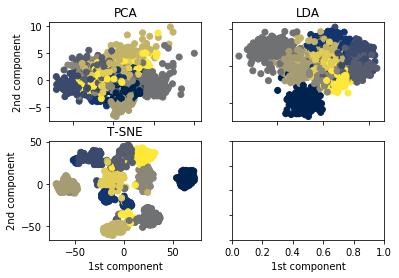

In [13]:
# Plot
y = y_digits 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')


for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

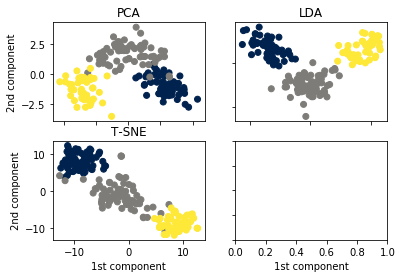

In [15]:
d1_pca, d2_pca = Dimesion_Reduction(reducer=PCA, X=X_wine, y=y_wine)
d1_lda, d2_lda = Dimesion_Reduction(reducer=LDA, X=X_wine, y=y_wine)
d1_tsne, d2_tsne = Dimesion_Reduction(reducer=TSNE, X=X_wine, y=y_wine)
# Plot
y = y_wine 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')

for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

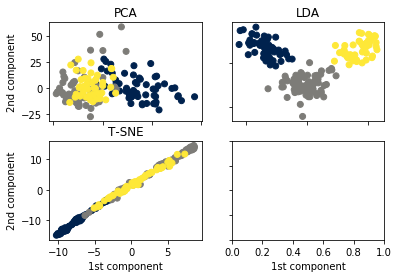

In [17]:

# Without standardizing the data
def Dimesion_Reduction1(reducer, X, y, *kwargs):
    #sc = StandardScaler()
    #X_std = sc.fit_transform(X)
    if reducer == LDA:
        umap = reducer().fit_transform(X, y) # As LDA is for supervised learning
    else:
        umap = reducer().fit_transform(X)
    d1, d2 = umap[:,0], umap[:,1]
    return d1, d2

# Collect the two components
d1_pca, d2_pca = Dimesion_Reduction1(reducer=PCA, X=X_wine, y=y_wine)
d1_lda, d2_lda = Dimesion_Reduction1(reducer=LDA, X=X_wine, y=y_wine)
d1_tsne, d2_tsne = Dimesion_Reduction1(reducer=TSNE, X=X_wine, y=y_wine)


# Plot
y = y_wine 
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(d1_pca, d2_pca, c=y, cmap = 'cividis')
axs[0, 0].set_title('PCA')
axs[0, 1].scatter(d1_lda, d2_lda, c=y, cmap = 'cividis')
axs[0, 1].set_title('LDA')
axs[1, 0].scatter(d1_tsne, d2_tsne, c=y, cmap = 'cividis')
axs[1, 0].set_title('T-SNE')


for ax in axs.flat:
    ax.set(xlabel='1st component', ylabel='2nd component')
for ax in axs.flat:
    ax.label_outer()

Discussion about exercise 3.

I have tried several different methods, but i simply cannot get the UMAP module to work. I have even tried several of the other students different answers, and tried to pip install umap, but i simply cannot seem to get it to behave in the correct way. I have gotten several different error messages, but most of them revolved about the module umap having no attribute UMAP.
I tried deleting the file folder on my computer and reinstalling or re importing, but no succes. So i will continue to work on getting it working.

But what can be seen in the graphs are that there are differences within the methods and there are differences that occurs when you standardize the wine data set.

The biggest differences are with the linear method, the T-sne dimension reduction method. When you see the methods with the unstandardized data then the PCA is not that good at categorizing.

After standardizing the data you see that the categories are more separated. This is due to the fact that the variables have different scales and thus makes it harder for the methods to categorize them.

This can be seen on the LDA method, as this method does not care about scales of the variables, which is why the standardization does not really affect this method.

The digit data set does not need to be scaled, as they are all on the same scale to begin with.

We notice that the LDA is much better at categorizing unstandatized data than the PCA method.
The linear T-sne method is quite good on the wine data, but it also performs well on the digits.


## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

# Solution
An honest decision tree means that there is an sample that is unused in the training of the decision trees, and this sample is then used to isolate the local treatment effect. If this was not the case, then the sample used to isolate the treament effect would also be part of the training set, and this could mean that the effects are biased.
